In [1]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# '#3E4F94', '#3E90BF', '#A6C0E3', '#ada9b9', '#c8c7a2'

In [2]:
import os
import pandas as pd
from plotnine import *
os.chdir(r'/data2/share/home/liyi/CbpTE/ReseqTE_matrix/19Ge_reseq_matrix/precision')
reseq_map_addr = f'/data2/share/home/liyi/CbpTE/ReseqTE_matrix/19Ge_reseq_matrix/int_file/reseq_map/'

tetra_ges = ['C162-2','C98-1','C111','C72-3','C90-2','C157-3','C215-4','C261-3','C244','C35-2','C37-1','C42-1','C58-2']
di_cor_ges = ['C13-2', 'C34-3', 'C42-2']
di_cru_ges = ['C879', 'C86', '690']
di_cru_reseq = ['879', '86IT1', '690']

In [3]:
matrix_Cor = pd.read_csv('/data2/share/home/liyi/CbpTE/PanTE_matrix/matrix_19/panTE.C162-2.Cor.matrix', sep='\t', dtype=str, keep_default_na=False)
matrix_Cor.columns = [col.replace('.Cor', '') for col in matrix_Cor.columns.tolist()]
matrix_Cru = pd.read_csv('/data2/share/home/liyi/CbpTE/PanTE_matrix/matrix_19/panTE.C162-2.Cru.matrix', sep='\t', dtype=str, keep_default_na=False)
matrix_Cru.columns = [col.replace('.Cru', '') for col in matrix_Cru.columns.tolist()]

In [4]:
def perform_calc(df, ref_name):
    TP = df[df.eq('1/1').all(axis=1)]
    TN = df[(df.eq('0/0').all(axis=1)) | (df.eq('./.').all(axis=1))]
    FP = df[(df['ref_gt'].isin(['0/0'])) & (df['reseq_gt'] == '1/1')]
    FN = df[(df['ref_gt'] == '1/1') & df['reseq_gt'].isin(['0/0'])]
    
    accuracy = (len(TP) + len(TN)) / (len(TP) + len(TN) + len(FP) + len(FN))
    precision = len(TP) / (len(TP) + len(FP)) if (len(TP) + len(FP)) > 0 else 0
    recall = len(TP) / (len(TP) + len(FN)) if (len(TP) + len(FN)) > 0 else 0
    F1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    performance = pd.Series([len(TP),len(TN),len(FP),len(FN),accuracy, precision, recall, F1],
                            index=['TP', 'TN', 'FP', 'FN', 'accuracy', 'precision', 'recall', 'F1'])
    performance = performance.to_frame(name=ref_name)

    return performance

In [5]:
perform_df = pd.DataFrame()
for i in range(0, len(tetra_ges)):   # tetra_ges
    print(f'{tetra_ges[i]} processing')
    ref_gt = pd.concat([matrix_Cor.iloc[:, i+5], matrix_Cru.iloc[:, i+5]])
    if ref_gt.name == tetra_ges[i]:
        ref_gt1 = ref_gt.replace(['1', '0', 'none', 'NA'], ['1/1', '0/0', './.', './.']).fillna('./.')
        ref_gt1[ref_gt1.str.contains('|'.join(['TE', 'repeat']), na=False)] = '1/1'
        
        reseq_gt = pd.read_csv(f'{reseq_map_addr}{tetra_ges[i]}.mat', sep='\t', dtype=str, usecols=[5]).iloc[:, 0]
        
        merged_df = ref_gt1.to_frame('ref_gt').join(reseq_gt.to_frame('reseq_gt'))
        
        performance = perform_calc(merged_df, tetra_ges[i])
        perform_df = pd.concat([perform_df, performance], axis=1)
    else:
        print(f'wrong col: {tetra_ges[i]} as ref, {ref_gt.name} as col')

C162-2 processing
C98-1 processing
C111 processing
C72-3 processing
C90-2 processing
C157-3 processing
C215-4 processing
C261-3 processing
C244 processing
C35-2 processing
C37-1 processing
C42-1 processing
C58-2 processing


In [6]:
for i in range(0, len(di_cor_ges)):   # di_cor_ges
    print(f'{di_cor_ges[i]} processing')
    ref_gt = matrix_Cor.iloc[:, i+18]
    if ref_gt.name == di_cor_ges[i]:
        ref_gt1 = ref_gt.replace(['1', '0', 'none', 'NA'], ['1/1', '0/0', './.', './.']).fillna('./.')
        ref_gt1[ref_gt1.str.contains('|'.join(['TE', 'repeat']), na=False)] = '1/1'
        
        reseq_gt =  pd.read_csv(f'{reseq_map_addr}{di_cor_ges[i]}.mat', sep='\t', dtype=str, usecols=[5]).iloc[:98357, 0]
        
        merged_df = ref_gt1.to_frame('ref_gt').join(reseq_gt.reset_index(drop=True).to_frame('reseq_gt'))
        
        performance = perform_calc(merged_df, di_cor_ges[i])
        perform_df = pd.concat([perform_df, performance], axis=1)
    else:
        print(f'wrong col: {di_cor_ges[i]} as ref, {ref_gt.name} as col')

C13-2 processing
C34-3 processing
C42-2 processing


In [7]:
for i in range(0, len(di_cru_ges)):   # di_cru_ges
# for i in range(0, 1):   # di_cru_ges
    print(f'{di_cru_ges[i]} processing')
    ref_gt = matrix_Cru.iloc[:, i+18]
    if ref_gt.name == di_cru_ges[i]:
        ref_gt1 = ref_gt.replace(['1', '0', 'none', 'NA'], ['1/1', '0/0', './.', './.']).fillna('./.')
        ref_gt1[ref_gt1.str.contains('|'.join(['TE', 'repeat']), na=False)] = '1/1'
    
        reseq_gt =  pd.read_csv(f'{reseq_map_addr}{di_cru_reseq[i]}.mat', sep='\t', dtype=str, usecols=[5]).iloc[98357:, 0]
        
        merged_df = ref_gt1.to_frame('ref_gt').join(reseq_gt.reset_index(drop=True).to_frame('reseq_gt'))
        
        performance = perform_calc(merged_df, di_cru_ges[i])
        perform_df = pd.concat([perform_df, performance], axis=1)
    else:
        print(f'wrong col: {di_cru_ges[i]} as ref, {ref_gt.name} as col')

C879 processing
C86 processing
690 processing


In [12]:
perform_df

,C162-2,C98-1,C111,C72-3,C90-2,C157-3,C215-4,C261-3,C244,C35-2,C37-1,C42-1,C58-2,C13-2,C34-3,C42-2,C879,C86,690
TP,63891.000000,56675.000000,62353.000000,56612.000000,53729.000000,56575.000000,60801.000000,61256.000000,68708.000000,55217.000000,55358.000000,52966.000000,57252.000000,40387.000000,39349.000000,39240.000000,43190.000000,36966.000000,33387.000000
TN,68174.000000,62778.000000,64676.000000,64444.000000,63937.000000,61251.000000,70410.000000,70280.000000,54636.000000,67983.000000,68000.000000,67604.000000,65037.000000,39386.000000,39094.000000,40223.000000,63667.000000,63514.000000,63283.000000
FP,43825.000000,37235.000000,42195.000000,38216.000000,37242.000000,38476.000000,42649.000000,43020.000000,41022.000000,40312.000000,40323.000000,37588.000000,38451.000000,3537.000000,3698.000000,3780.000000,3544.000000,3798.000000,4556.000000
FN,20433.000000,19500.000000,25436.000000,21113.000000,19939.000000,19491.000000,23042.000000,22765.000000,18437.000000,23080.000000,23110.000000,23816.000000,24551.000000,1292.000000,1643.000000,3429.000000,1763.000000,7261.000000,6978.000000
accuracy,0.672692,0.677986,0.652569,0.671098,0.672966,0.670254,0.666377,0.666609,0.674737,0.660264,0.660407,0.662567,0.659983,0.942921,0.936253,0.916824,0.952685,0.900851,0.893405
precision,0.593143,0.603503,0.596405,0.596997,0.590617,0.595207,0.587733,0.587441,0.626155,0.578013,0.578568,0.584911,0.598226,0.919475,0.914094,0.912134,0.924167,0.906830,0.879925
recall,0.757685,0.744011,0.710260,0.728363,0.729340,0.743762,0.725177,0.729056,0.788433,0.705225,0.705485,0.689823,0.699877,0.969001,0.959919,0.919637,0.960781,0.835824,0.827127
F1,0.665393,0.666431,0.648372,0.656169,0.652689,0.661243,0.649261,0.650632,0.697986,0.635313,0.635754,0.633050,0.645071,0.943588,0.936446,0.915870,0.942118,0.869880,0.852710


In [8]:
perform_df.to_csv(f'pangenie.performance.1', sep='\t')

In [9]:
perform_df.mean(axis=1)

TP           53524.947368
TN           60494.842105
FP           29252.473684
FN           15358.000000
accuracy         0.749852
precision        0.694565
recall           0.797215
F1               0.739955
dtype: float64

In [10]:
perform_df1 = perform_df.iloc[4:, :]
perform_df1_long = perform_df1.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
perform_df1_long.rename(columns={'index': 'Specie'}, inplace=True)
perform_df1_long['Specie'] = pd.Categorical(perform_df1_long['Specie'], categories=tetra_ges+di_cor_ges+di_cru_ges, ordered=True)
# df_long = perform_df.melt(id_vars='Metric', var_name='Sample', value_name='Value')
# df_long

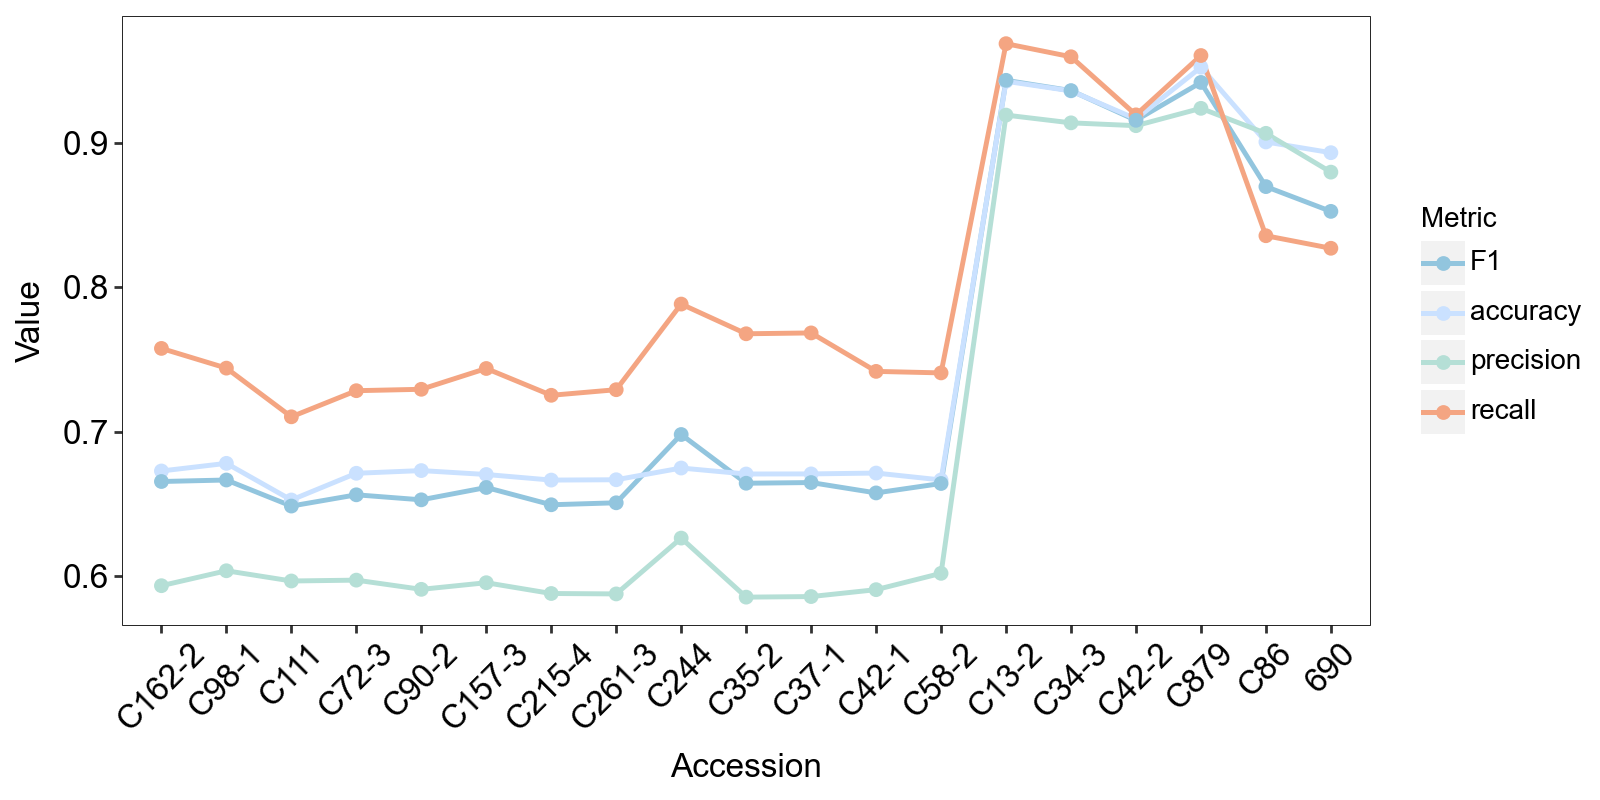

/data2/share/home/liyi/software/miniconda3/envs/plot_make/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/data2/share/home/liyi/software/miniconda3/envs/plot_make/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: pg-mat.perform.1.svg


In [11]:
custom_colors = ['#92c5de', '#cae1ff', '#b5dfd6', '#f4a582']

plot = (
    ggplot(perform_df1_long, aes(x='Specie', y='Value', color='Metric', group='Metric'))
    + geom_line(size=1)
    + geom_point(size=2)
    + scale_color_manual(values=custom_colors)
    + labs(x='Accession',y='Value',color='Metric'
    )
    + theme(figure_size=(8,4),
        # legend_position=(0.98, 0.98),
        axis_title_x=element_text(size=12, color="black", family="Arial"),
        axis_title_y=element_text(size=12, color="black", family="Arial"), 
        axis_text_x=element_text(size=12, color="black", family="Arial", rotation=45),
        axis_text_y=element_text(size=12, color="black", family="Arial"),
        legend_title=element_text(size=10, family="Arial"), 
        legend_text=element_text(size=10, family="Arial"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_background=element_rect(fill='white'),
        panel_border=element_rect(color="black", size=0.3),
    )
)

# 显示图形
plot.show()
plot.save("pg-mat.perform.1.svg", format="svg", dpi=300)